In [1]:
import sys
sys.path.append('../..')

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Individual

In [2]:
grid = 5
sub_grid = 5

folder = f'/storage/arnaud/real_data_test_fine_results/threshold_tests-{grid}_{grid}-{sub_grid}_{sub_grid}/'

In [3]:
files = os.listdir(folder)
files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

# Gather thresholds
thresholds = []
for file in files:
    thresh = (file.split('-')[0].split('_')[-1])
    if thresh not in thresholds:
        thresholds.append(thresh)

thresholds = sorted(thresholds, reverse=True)
thresholds_num = [round(float(thresh), 5) for thresh in thresholds]
thresholds_pretty = [f'{thresh:.0E}' for thresh in thresholds_num]

# Gather environment ids
environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
environment_ids.sort()

# Building results dataframe
rows = []
for thresh, thresh_num in zip(thresholds, thresholds_pretty):
    for env_i in environment_ids:
        df = pd.read_csv(folder + f't_{thresh}-env_{env_i}-analysis.csv', index_col=0)

        rows.append({
            'threshold': thresh_num,
            'environment': env_i,
            'convergence': df['converged']['mean'],
            'convergence_std': df['converged']['standard_deviation'],
            't_min_over_t': df['steps_taken']['success_mean'],
            't_min_over_t_std': df['steps_taken']['success_standard_deviation']
        })
results_df = pd.DataFrame(rows)

In [4]:
results_df

,threshold,environment,convergence,convergence_std,t_min_over_t,t_min_over_t_std
0,1E-01,0,0.9673423423423423,0.17773895198850728,452.145518,272.367035
1,1E-01,1,0.008445945945945946,0.09151290588230769,869.500000,9.118946
2,1E-01,2,1.0,0.0,334.295890,151.892375
3,1E-01,3,0.28969594594594594,0.45362121296124314,957.258503,130.783174
4,1E-01,4,0.15427927927927929,0.36121625553724107,920.452555,145.386969
...,...,...,...,...,...,...
331,1E-04,7,0.01126126126126126,0.10551988085695926,561.675000,204.399231
332,1E-04,8,0.0022522522522522522,0.04740442608074141,799.375000,240.593871
333,1E-04,9,0.25309684684684686,0.4347859622423781,292.143493,115.533451
334,1E-04,10,0.4510135135135135,0.4975945378937647,250.890137,282.242976


In [5]:
# source_positions = []
# for env_i in environment_ids:
#     df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
#     env_source_pos = np.array([int(part) for part in df['environment'][4].split('_')])
#     source_positions.append(env_source_pos)

## For all

In [6]:
def get_results(grid, subgrid) -> pd.DataFrame:
    folder = f'/storage/arnaud/real_data_test_fine_results/threshold_tests-{grid}_{grid}-{subgrid}_{subgrid}/'

    # Gather files
    files = os.listdir(folder)
    files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

    # Gather thresholds
    thresholds = []
    for file in files:
        thresh = (file.split('-')[0].split('_')[-1])
        if thresh not in thresholds:
            thresholds.append(thresh)

    thresholds = sorted(thresholds, reverse=True)
    thresholds_num = [round(float(thresh), 5) for thresh in thresholds]
    thresholds_pretty = [f'{thresh:.0E}' for thresh in thresholds_num]

    # Gather environment ids
    environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
    environment_ids.sort()

    # Building results dataframe
    rows = []
    for thresh, thresh_num in zip(thresholds, thresholds_pretty):
        for env_i in environment_ids:
            df = pd.read_csv(folder + f't_{thresh}-env_{env_i}-analysis.csv', index_col=0)

            rows.append({
                'threshold': thresh_num,
                'environment': env_i,
                'convergence': df['converged']['mean'],
                'convergence_std': df['converged']['standard_deviation'],
                't_min_over_t': df['steps_taken']['success_mean'],
                't_min_over_t_std': df['steps_taken']['success_standard_deviation']
            })
    results_df = pd.DataFrame(rows)

    return results_df

In [7]:
all_test_grids = np.array([
    [5,5],
    [5,7],
    [7,5],
    [7,7],
    [9,5],
    [9,7]
])

all_result_dfs = [get_results(grid, subgrid) for grid, subgrid in all_test_grids]

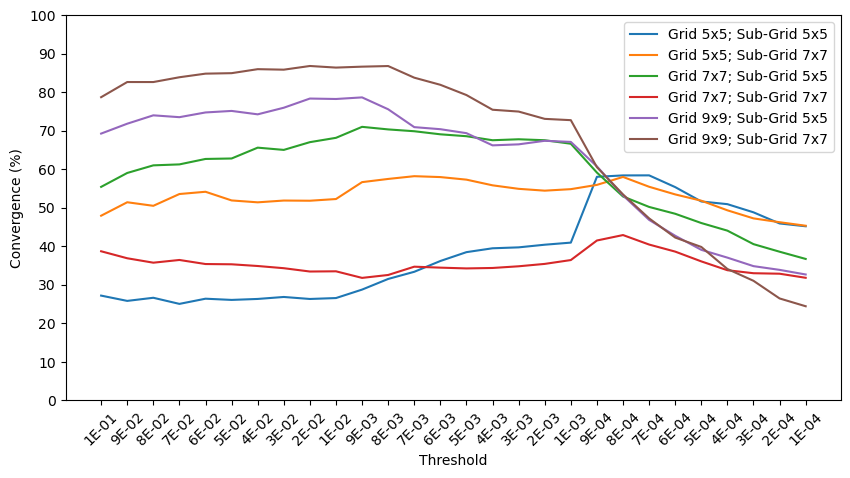

In [11]:
metric_label = 'Convergence'
plt.figure(figsize=(10,5))
x = np.arange(len(thresholds_num))
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(x,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold')
plt.xticks(x, labels=thresholds_pretty, rotation=45)
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, np.arange(11)*10)
plt.legend()
plt.show()

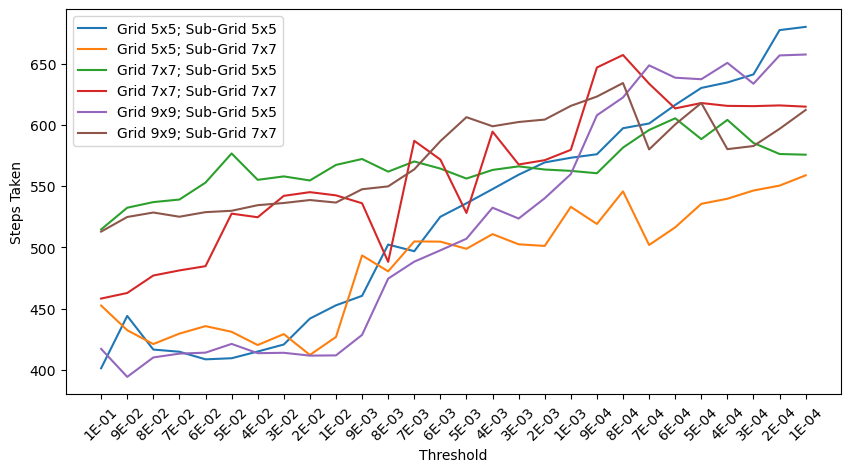

In [10]:
metric_label = 't_min_over_t'
plt.figure(figsize=(10,5))
x = np.arange(len(thresholds_num))
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(x,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold')
plt.xticks(x, labels=thresholds_pretty, rotation=45)
plt.ylabel(f'Steps Taken')
plt.legend()
plt.show()

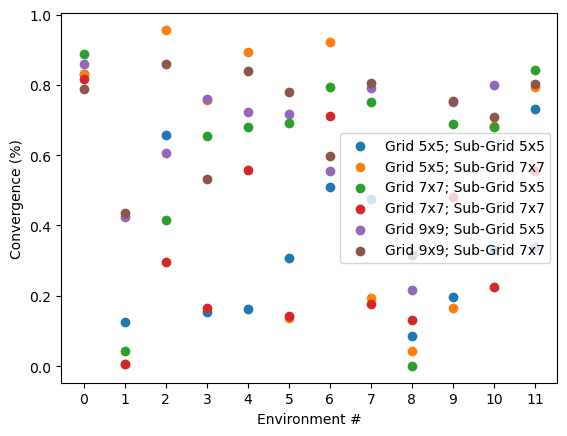

In [12]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

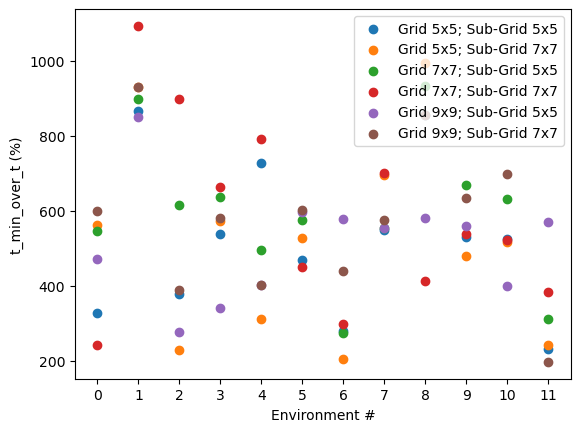

In [13]:
metric_label = 't_min_over_t'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()